<a href="https://colab.research.google.com/github/nakajitara/fechira_huntsuke/blob/main/fechira_huntsuke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importar dependencias

In [72]:
import numpy as np # librería para operaciones numericas
import pandas as pd # libreria para pre-procesamiento del dataset
#librerías para realizar los gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
#Función para establecer el estilo de los gráficos
styles=plt.style.available
print(styles)
plt.style.use('dark_background')
#dependencias para pre-procesamiebnto y validación de los modelos
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import RobustScaler # función para escalar las variables
from sklearn.model_selection import train_test_split,cross_val_score # función para dividir dataset y realizar validación
from sklearn.metrics import mean_absolute_error # funcion para realizar validación
from sklearn.metrics import mean_squared_error # funcion para realizar validación
# deopendencias para construir los modelos
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
#Dependencia para guardar el modelo
import joblib

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [73]:
#from google.colab import drive
#drive.mount('/content/drive')

# importar dataset

In [74]:
# importar dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/games-features.csv')
# comprobar dataset importado
print(dataset.shape)
print(dataset.columns)
print(dataset.dtypes[0:40])
print(dataset.dtypes[40:80])
dataset.head(n=2)

(13357, 78)
Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,NaN,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,NaN,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


# eliminar variables irrelevantes

In [75]:
#Comprobar relevancia de variable PriceCurrency
dataset_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/games-features.csv')
print(dataset_test.PriceCurrency.unique())
dataset_test.PriceCurrency.head(n=2)

['USD' ' ']


,PriceCurrency
0,USD
1,USD


In [76]:
dataset['PriceCurrency']=dataset['PriceCurrency'].str.replace(' ','non_USD')
print(dataset.PriceCurrency.unique())
dataset.PriceCurrency.head(n=2)

['USD' 'non_USD']


,PriceCurrency
0,USD
1,USD


In [77]:
# crear un objeto OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Aplicar el 'OneHotEncoder' a la variable categórica
ohe.fit(dataset[['PriceCurrency']])
# Transformar la variable categórica en una matriz codificada " one-hot ".
encoded_track_genre = ohe.transform(dataset[['PriceCurrency']])
# Obtener los nombres de las nuevas funciones
encoded_track_genre_names = ohe.get_feature_names_out(['PriceCurrency'])
# Añadir las características codificadas al conjunto de datos
dataset=pd.concat([dataset, pd.DataFrame(encoded_track_genre, columns=encoded_track_genre_names)], axis=1)
# Eliminar la variable categórica original
dataset.drop(['PriceCurrency'], axis=1, inplace=True)
# comprobar resultados
print(dataset.shape)
print(dataset.columns)
dataset.head(n=2)

(13357, 79)
Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,PriceCurrency_USD,PriceCurrency_non_USD
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,English French German Italian Spanish Simplifi...,NaN,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,,1.0,0.0
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,English French German Italian Spanish,NaN,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,,1.0,0.0


In [78]:
#eliminación de variables por medio de la función drop sobre el eje 1
delete=['QueryID','Website','ResponseID','ReleaseDate','PCMinReqsText','PCRecReqsText','LinuxMinReqsText','LinuxRecReqsText',
    'Background','ShortDescrip','DetailedDescrip','DRMNotice','ExtUserAcctNotice','HeaderImage','LegalNotice',
    'Reviews','MacMinReqsText','MacRecReqsText','SupportEmail','SupportURL','AboutText', 'QueryName']
dataset.drop(delete,axis=1,inplace=True)
# mostrar los resultados
print(dataset.shape)
print(dataset.columns)
print(dataset.dtypes)
dataset.head(n=2)

(13357, 57)
Index(['ResponseName', 'RequiredAge', 'DemoCount', 'DeveloperCount',
       'DLCCount', 'Metacritic', 'MovieCount', 'PackageCount',
       'RecommendationCount', 'PublisherCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
       'SteamSpyPlayersVariance', 'AchievementCount',
       'AchievementHighlightedCount', 'ControllerSupport', 'IsFree',
       'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail', 'PlatformWindows',
       'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
       'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor',
       'CategoryVRSupport', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSi

,ResponseName,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,...,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,SupportedLanguages,PriceCurrency_USD,PriceCurrency_non_USD
0,Counter-Strike,0,0,1,0,88,0,1,68991,1,...,False,False,False,False,False,9.99,9.99,English French German Italian Spanish Simplifi...,1.0,0.0
1,Team Fortress Classic,0,0,1,0,0,0,1,2439,1,...,False,False,False,False,False,4.99,4.99,English French German Italian Spanish,1.0,0.0


# conversión de tipos de datos

In [79]:
#convertir variables booleanas a números enteros con la función astype
bools=['ControllerSupport','IsFree','FreeVerAvail','PurchaseAvail','SubscriptionAvail','PlatformWindows','PlatformLinux',
       'PlatformMac','PCReqsHaveMin','PCReqsHaveRec','LinuxReqsHaveMin','LinuxReqsHaveRec','MacReqsHaveMin',
       'CategoryInAppPurchase','MacReqsHaveRec', 'CategorySinglePlayer','CategoryMultiplayer','CategoryCoop','CategoryMMO',
       'CategoryIncludeSrcSDK','CategoryIncludeLevelEditor','CategoryVRSupport','GenreIsNonGame','GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports','GenreIsRacing', 'GenreIsMassivelyMultiplayer',]
convert_types=dataset[bools].astype('float64')
#eliminar variables booleanas innecesarias con la función drop aplicada sobre el eje 1
dataset.drop(bools,axis=1,inplace=True)
# concatenar las variables booleanas convertidas a números con el resto del dataset con la función concat
dataset=pd.concat([dataset,convert_types],axis=1)
print(dataset.columns)
print(dataset.shape)
dataset.head(n=2)

Index(['ResponseName', 'RequiredAge', 'DemoCount', 'DeveloperCount',
       'DLCCount', 'Metacritic', 'MovieCount', 'PackageCount',
       'RecommendationCount', 'PublisherCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
       'SteamSpyPlayersVariance', 'AchievementCount',
       'AchievementHighlightedCount', 'PriceInitial', 'PriceFinal',
       'SupportedLanguages', 'PriceCurrency_USD', 'PriceCurrency_non_USD',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac',
       'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin',
       'LinuxReqsHaveRec', 'MacReqsHaveMin', 'CategoryInAppPurchase',
       'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAct

,ResponseName,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,...,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,Counter-Strike,0,0,1,0,88,0,1,68991,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Team Fortress Classic,0,0,1,0,0,0,1,2439,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# análisis de la variable categórica SupportedLanguages

Cada categoría posee valores en formato string, no obstante cada valor string posee múltiples variables dentro de un mismo string, lo que dificulta el preprocesamiento, haciendo poco viable usar métodos como one hot encoder, label encoder u ordinal encoder, por lo que se va a limpiar la variable de elementos innecesarios y dejará en un formato legible para poder saber qué categorías se puede extraer con esta variable.

In [80]:
# revisión inicial y superficial de sus valores buscando contenido textual irrelevante
print(len(dataset.SupportedLanguages.unique()))
dataset.SupportedLanguages.unique()

2381


array(['English French German Italian Spanish Simplified Chinese Traditional Chinese Korean',
       'English French German Italian Spanish',
       'English French German Korean', ...,
       'English* German Korean Russian*languages with full audio support',
       'English Ukrainian**languages with full audio support',
       'English* French Italian German* Spanish Dutch**languages with full audio support'],
      dtype=object)

In [81]:
# Generación de una copia temporal para realizar la edición de los valores
dataset_mod=dataset.copy()
# eliminar datos textuales irrelevantes y dejar texto en el formato más legible posible con str.replace
dataset_mod.columns.str.lower()
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('(all with full audio support)',' audio_traduction')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('Traditional Chinese','Traditional_Chinese, Chinese')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('Simplified Chinese','Simplified_Chinese, Chinese')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('-Brazil','').str.replace(')','').str.replace('(','').str.replace('*','')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('languages with full audio support',' audio_traduction')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('text only',' text_only').str.replace('text_only)','')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('[/b]','').str.replace("[b]", "")
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('HungarianPolish','Hungarian Polish')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('RussianEnglishSpanishFrenchJapaneseCzech','Russian English Spanish French Japanese Czech')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('EnglishRussianSpanishJapaneseCzech','English Russian Spanish Japanese Czech')
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('A','a').str.replace("B","b").str.replace("C","c").str.replace("D","d")
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('E','e').str.replace("F","f").str.replace("G","g").str.replace("H","h")
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('I','i').str.replace("J","j").str.replace("K","k").str.replace("N","n")
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace('P','p').str.replace("R","r").str.replace("S","s").str.replace("T","t").str.replace("U","u")
dataset_mod['SupportedLanguages']=dataset_mod['SupportedLanguages'].str.replace(' ',',')
# comprobar resultados
print(dataset_mod.shape)
dataset_mod['SupportedLanguages'].head(n=8)

(13357, 57)


,SupportedLanguages
0,"english,french,german,italian,spanish,simplifi..."
1,"english,french,german,italian,spanish"
2,"english,french,german,italian,spanish"
3,"english,french,german,italian,spanish"
4,"english,french,german,korean"
5,"english,french,german,italian,spanish"
6,"english,french,german,italian,spanish,simplifi..."
7,"english,french,german,italian,spanish,simplifi..."


In [82]:
# prompt: preprocesar la varaible categorica  SupportedLanguages con multilabel

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Crear una lista de listas, donde cada sublista contiene las etiquetas de cada fila
supported_languages_list = dataset_mod['SupportedLanguages'].str.split(',').tolist()

# Crear un objeto MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Ajustar y transformar la lista de listas en una matriz binaria
encoded_supported_languages = mlb.fit_transform(supported_languages_list)

# Obtener los nombres de las nuevas columnas
encoded_supported_languages_names = mlb.classes_

# Crear un nuevo DataFrame con las columnas codificadas
encoded_supported_languages_df = pd.DataFrame(encoded_supported_languages, columns=encoded_supported_languages_names)
# convertir datos de encoded_supported_languages_df a float
encoded_supported_languages_df=encoded_supported_languages_df.astype('float64')
# piner language_ antes de nombre de variable en encoded_supported_languages_df
encoded_supported_languages_df.columns = ['language_' + col for col in encoded_supported_languages_df.columns]
# Concatenar el DataFrame codificado con el DataFrame original
dataset_mod = pd.concat([dataset_mod, encoded_supported_languages_df], axis=1)

# Eliminar la columna original 'SupportedLanguages'
dataset_mod.drop('SupportedLanguages', axis=1, inplace=True)

# Mostrar los resultados
print(dataset_mod.shape)
print(encoded_supported_languages_df.columns)
dataset_mod.head(n=2)


(13357, 88)
Index(['language_', 'language_arabic', 'language_audio_traduction',
       'language_bulgarian', 'language_chinese', 'language_czech',
       'language_danish', 'language_dutch', 'language_english',
       'language_finnish', 'language_french', 'language_german',
       'language_german;', 'language_greek', 'language_hungarian',
       'language_italian', 'language_japanese', 'language_korean',
       'language_norwegian', 'language_polish', 'language_portuguese',
       'language_romanian', 'language_russian', 'language_simplified_chinese',
       'language_slovakian', 'language_spanish', 'language_swedish',
       'language_text_only', 'language_thai', 'language_traditional_chinese',
       'language_turkish', 'language_ukrainian'],
      dtype='object')


,ResponseName,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,...,language_russian,language_simplified_chinese,language_slovakian,language_spanish,language_swedish,language_text_only,language_thai,language_traditional_chinese,language_turkish,language_ukrainian
0,Counter-Strike,0,0,1,0,88,0,1,68991,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Team Fortress Classic,0,0,1,0,0,0,1,2439,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# procedimiento usado inicialmente, posteriormente se reviso un enfoqu alterno con la función MultiLabelBinarizer
# puestro que hace esto de modo más limpio e intuitivo
#language=dataset_mod.copy()
# extraer categorías que surgen de SupportedLanguages con str.split
#language['SupportedLanguages']=language['SupportedLanguages'].str.split(",")
# pasar categorías extraídas a un dataframe temporal
#temp_df=language['SupportedLanguages'].explode(ignore_index=True).to_frame()
#print(temp_df.head(n=6))
#$datos=temp_df.pop('SupportedLanguages')
#result=temp_df.merge(pd.get_dummies(datos,prefix_sep='_',prefix='language'),left_index=True,right_index=True).groupby(level=0).first().reset_index(drop=True)
#delete=['language_']
#result.drop(delete,axis=1,inplace=True)
#print(result.columns)
#print(result.shape)
#result.head(n=16)

In [84]:
# crear variables en base a categorías extraídas desde el análisis de la variable SupportedLanguages
#dataset_mod['language_arabic']=np.where(dataset_mod['SupportedLanguages'].str.contains('arabic'),1.0,0.0)
#dataset_mod['language_bulgarian']=np.where(dataset_mod['SupportedLanguages'].str.contains('bulgarian'),1.0,0.0)
#dataset_mod['language_chinese']=np.where(dataset_mod['SupportedLanguages'].str.contains('chinese'),1.0,0.0)
#dataset_mod['language_chinese']=np.where(dataset_mod['SupportedLanguages'].str.contains('chinese'),1.0,0.0)
#dataset_mod['language_chinese']=np.where(dataset_mod['SupportedLanguages'].str.contains('chinese'),1.0,0.0)
#dataset_mod['language_chinese']=np.where(dataset_mod['SupportedLanguages'].str.contains('chinese'),1.0,0.0)
#dataset_mod['language_czech']=np.where(dataset_mod['SupportedLanguages'].str.contains('czech'),1.0,0.0)
#dataset_mod['language_danish']=np.where(dataset_mod['SupportedLanguages'].str.contains('danish'),1.0,0.0)
#dataset_mod['language_dutch']=np.where(dataset_mod['SupportedLanguages'].str.contains('dutch'),1.0,0.0)
#dataset_mod['language_english']=np.where(dataset_mod['SupportedLanguages'].str.contains('english'),1.0,0.0)
#dataset_mod['language_finnish']=np.where(dataset_mod['SupportedLanguages'].str.contains('finnish'),1.0,0.0)
#dataset_mod['language_french']=np.where(dataset_mod['SupportedLanguages'].str.contains('french'),1.0,0.0)
#dataset_mod['language_german']=np.where(dataset_mod['SupportedLanguages'].str.contains('german'),1.0,0.0)
#dataset_mod['language_greek']=np.where(dataset_mod['SupportedLanguages'].str.contains('greek'),1.0,0.0)
#dataset_mod['language_hungarian']=np.where(dataset_mod['SupportedLanguages'].str.contains('hungarian'),1.0,0.0)
#dataset_mod['language_italian']=np.where(dataset_mod['SupportedLanguages'].str.contains('italian'),1.0,0.0)
#dataset_mod['language_japanese']=np.where(dataset_mod['SupportedLanguages'].str.contains('japanese'),1.0,0.0)
#dataset_mod['language_korean']=np.where(dataset_mod['SupportedLanguages'].str.contains('korean'),1.0,0.0)
#dataset_mod['language_norwegian']=np.where(dataset_mod['SupportedLanguages'].str.contains('norwegian'),1.0,0.0)
#dataset_mod['language_polish']=np.where(dataset_mod['SupportedLanguages'].str.contains('polish'),1.0,0.0)
#dataset_mod['language_portuguese']=np.where(dataset_mod['SupportedLanguages'].str.contains('portuguese'),1.0,0.0)
#dataset_mod['language_romanian']=np.where(dataset_mod['SupportedLanguages'].str.contains('romanian'),1.0,0.0)
#dataset_mod['language_russian']=np.where(dataset_mod['SupportedLanguages'].str.contains('russian'),1.0,0.0)
#dataset_mod['language_slovakian']=np.where(dataset_mod['SupportedLanguages'].str.contains('slovakian'),1.0,0.0)
#dataset_mod['language_spanish']=np.where(dataset_mod['SupportedLanguages'].str.contains('spanish'),1.0,0.0)
#dataset_mod['language_swedish']=np.where(dataset_mod['SupportedLanguages'].str.contains('swedish'),1.0,0.0)
#dataset_mod['language_thai']=np.where(dataset_mod['SupportedLanguages'].str.contains('thai'),1.0,0.0)
#dataset_mod['language_turkish']=np.where(dataset_mod['SupportedLanguages'].str.contains('turkish'),1.0,0.0)
#dataset_mod['language_ukrainian']=np.where(dataset_mod['SupportedLanguages'].str.contains('ukrainian'),1.0,0.0)
#ataset_mod['audio_traduction']=np.where(dataset_mod['SupportedLanguages'].str.contains('audio_traduction'),1.0,0.0)
# comprobar los resultados
#print(dataset_mod.shape)
#print(dataset_mod.columns)
#cols=['SupportedLanguages','language_arabic','language_bulgarian','language_chinese','language_czech','language_danish',
      #'language_dutch','language_english','language_finnish','language_french','language_german','language_greek',
      #'language_hungarian','language_italian','language_japanese','language_korean','language_norwegian','language_polish',
      #'language_portuguese','language_romanian','language_russian','language_slovakian','language_spanish',
      #'language_swedish', 'language_thai','language_turkish','language_ukrainian']
# copia del dataset antes de escalar
#dataset_mod.to_csv('steam_dataset.csv')
#dataset_mod[cols].head(n=8)

# comprobar valores nulos

In [ ]:
print(dataset_mod.isnull().sum()[0:30])
print(dataset_mod.isnull().sum()[30:60])
print(dataset_mod.isnull().sum()[60:80])

ResponseName                   0
RequiredAge                    0
DemoCount                      0
DeveloperCount                 0
DLCCount                       0
Metacritic                     0
MovieCount                     0
PackageCount                   0
RecommendationCount            0
PublisherCount                 0
ScreenshotCount                0
SteamSpyOwners                 0
SteamSpyOwnersVariance         0
SteamSpyPlayersEstimate        0
SteamSpyPlayersVariance        0
AchievementCount               0
AchievementHighlightedCount    0
PriceInitial                   0
PriceFinal                     0
SupportedLanguages             0
PriceCurrency_USD              0
PriceCurrency_non_USD          0
ControllerSupport              0
IsFree                         0
FreeVerAvail                   0
PurchaseAvail                  0
SubscriptionAvail              0
PlatformWindows                0
PlatformLinux                  0
PlatformMac                    0
dtype: int

# Describir los datos

In [85]:
dataset_mod.describe()

,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,...,language_russian,language_simplified_chinese,language_slovakian,language_spanish,language_swedish,language_text_only,language_thai,language_traditional_chinese,language_turkish,language_ukrainian
count,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,1.335700e+04,13357.000000,13357.000000,...,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000
mean,0.837688,0.089541,1.032492,0.805944,12.285319,1.321255,1.088418,1.180463e+03,0.989668,9.561204,...,0.196002,0.063188,0.000150,0.245414,0.028225,0.000075,0.008235,0.038182,0.030396,0.014599
std,3.625701,0.286058,0.437113,10.034901,27.510876,1.178400,0.855219,1.517606e+04,0.336972,6.442893,...,0.396985,0.243310,0.012236,0.430349,0.165621,0.008653,0.090378,0.191643,0.171681,0.119946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.430000e+02,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2.000000,12.000000,630.000000,96.000000,20.000000,18.000000,1.427633e+06,4.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# escalar las variables

In [86]:
# escalar dataset
scale_x=['DemoCount','DeveloperCount','DLCCount','Metacritic','MovieCount','PackageCount','RecommendationCount',
       'PublisherCount','ScreenshotCount','SteamSpyOwners','SteamSpyOwnersVariance',
       'AchievementCount','AchievementHighlightedCount','PriceFinal','PriceInitial','RequiredAge']
scale_y=['SteamSpyPlayersEstimate']#la varaible'SteamSpyPlayersVariance' fue descartada
transform_x=RobustScaler()
transform_y=RobustScaler()#.fit(dataset_mod['SteamSpyPlayersEstimate'].values.reshape(1,-1))
dataset_mod[scale_x]=transform_x.fit_transform(dataset_mod[scale_x])
dataset_mod[scale_y]=transform_y.fit_transform(dataset_mod[scale_y])
joblib.dump(transform_x,'/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/transform_x.pkl')
joblib.dump(transform_y,'/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/transform_y.pkl')
# mostrar los resultados
dataset_mod[scale_x].head(n=5)

,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,AchievementCount,AchievementHighlightedCount,PriceFinal,PriceInitial,RequiredAge
0,0.0,0.0,0.0,88.0,-1.0,0.0,283.913580,0.0,0.833333,218.726119,16.323806,0.0,0.0,0.500,0.500,0.0
1,0.0,0.0,0.0,0.0,-1.0,0.0,10.037037,0.0,-0.500000,90.515148,10.458936,0.0,0.0,-0.125,-0.125,0.0
2,0.0,0.0,0.0,79.0,-1.0,0.0,9.543210,0.0,-0.500000,127.831452,12.472504,0.0,0.0,-0.125,-0.125,0.0
3,0.0,0.0,0.0,0.0,-1.0,0.0,3.654321,0.0,-0.666667,125.780247,12.370658,0.0,0.0,-0.125,-0.125,0.0
4,0.0,0.0,0.0,0.0,-1.0,0.0,12.074074,0.0,-0.500000,90.521178,10.459298,0.0,0.0,-0.125,-0.125,0.0


In [87]:
dataset_mod[scale_y].head(n=5)

,SteamSpyPlayersEstimate
0,330.784765
1,27.135223
2,61.750661
3,28.440353
4,25.401542


# Eliminar valores atípicos

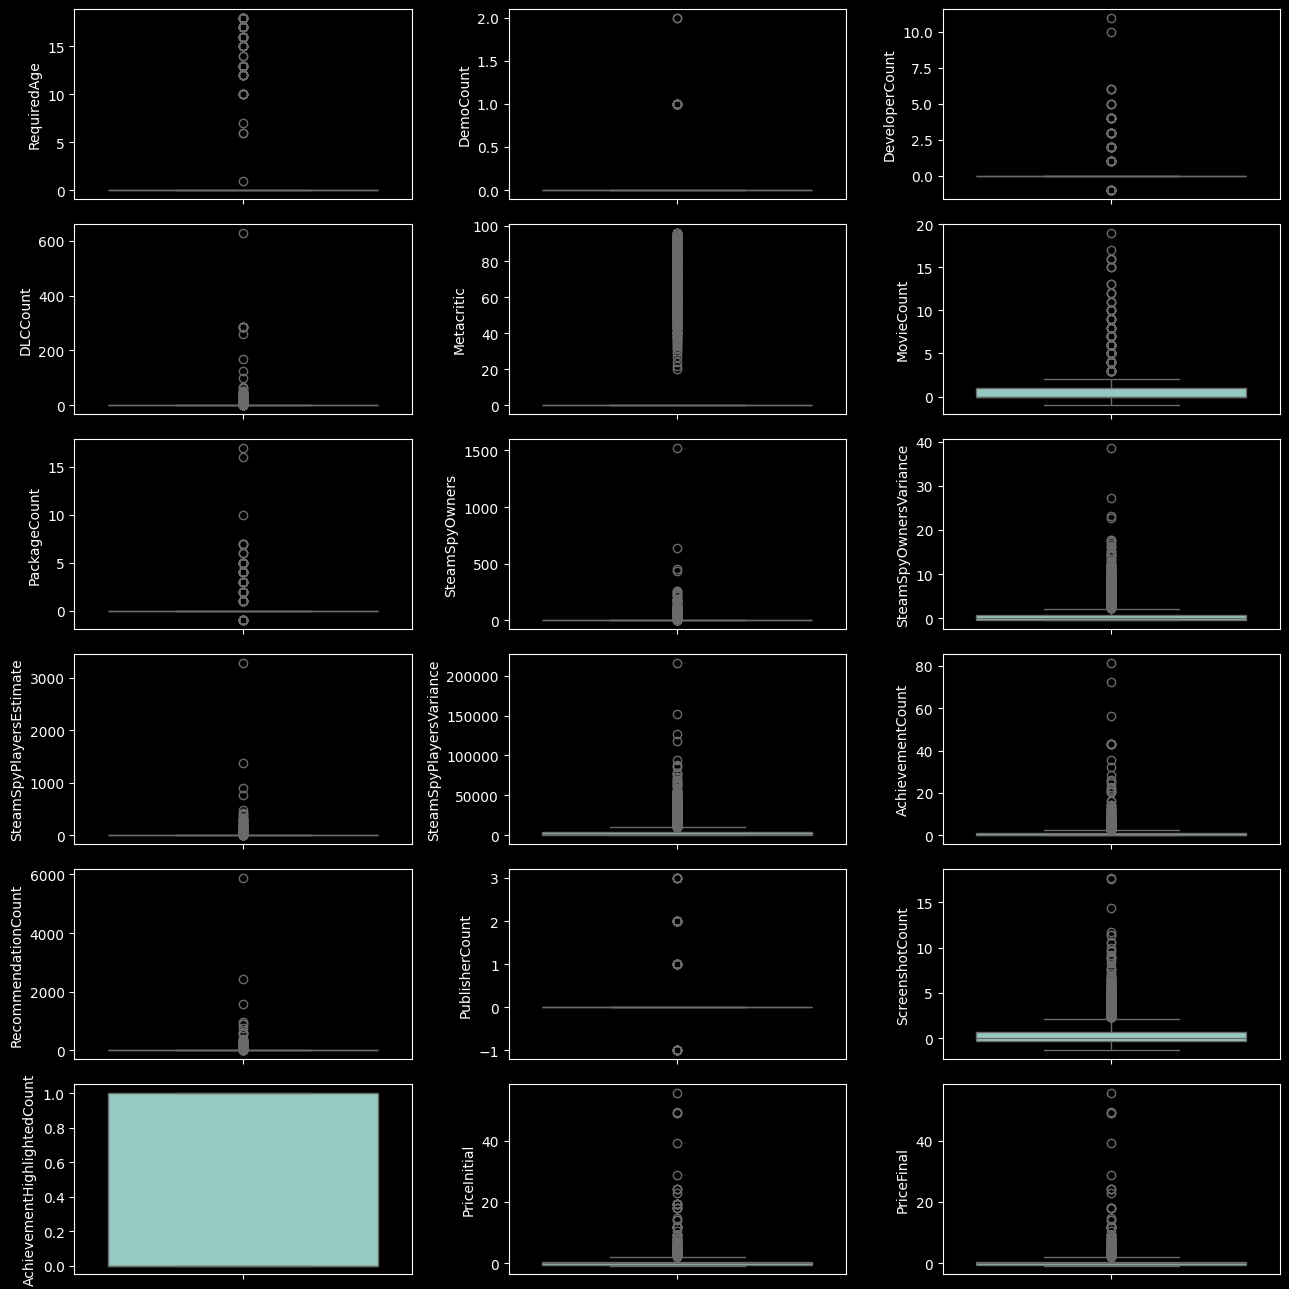

In [88]:
# Verificar si hay valores atípicos en variables no binarias por medio de un gráfico de cajas
#Crear una figura con múltiples gráficos
fig,axes=plt.subplots(6,3,figsize=(13,13))
#Trazar el diagrama de caja
sns.boxplot(y=dataset_mod['RequiredAge'],ax=axes[0,0])
sns.boxplot(y=dataset_mod['DemoCount'],ax=axes[0,1])
sns.boxplot(y=dataset_mod['DeveloperCount'],ax=axes[0,2])
sns.boxplot(y=dataset_mod['DLCCount'],ax=axes[1,0])
sns.boxplot(y=dataset_mod['Metacritic'],ax=axes[1,1])
sns.boxplot(y=dataset_mod['MovieCount'],ax=axes[1,2])
sns.boxplot(y=dataset_mod['PackageCount'],ax=axes[2,0])
sns.boxplot(y=dataset_mod['SteamSpyOwners'],ax=axes[2,1])
sns.boxplot(y=dataset_mod['SteamSpyOwnersVariance'],ax=axes[2,2])
sns.boxplot(y=dataset_mod['SteamSpyPlayersEstimate'],ax=axes[3,0])
sns.boxplot(y=dataset_mod['SteamSpyPlayersVariance'],ax=axes[3,1])
sns.boxplot(y=dataset_mod['AchievementCount'],ax=axes[3,2])
sns.boxplot(y=dataset_mod['RecommendationCount'],ax=axes[4,0])
sns.boxplot(y=dataset_mod['PublisherCount'],ax=axes[4,1])
sns.boxplot(y=dataset_mod['ScreenshotCount'],ax=axes[4,2])
sns.boxplot(y=dataset_mod['AchievementHighlightedCount'],ax=axes[5,0])
sns.boxplot(y=dataset_mod['PriceInitial'],ax=axes[5,1])
sns.boxplot(y=dataset_mod['PriceFinal'],ax=axes[5,2])
#Ajustar el espaciado entre gráficos
plt.tight_layout()
#Mostrar gráficos
plt.show()

In [89]:
# eliminación de valores atípicos
dataset_def=dataset_mod.copy()
dataset_def=dataset_def[dataset_def['DemoCount']<2]
dataset_def=dataset_def[dataset_def['Metacritic']<78.0]
dataset_def=dataset_def[dataset_def['DeveloperCount']<2.5]
dataset_def=dataset_def[dataset_def['DeveloperCount']>-2]
dataset_def=dataset_def[dataset_def['SteamSpyOwners']<100]
dataset_def=dataset_def[dataset_def['ScreenshotCount']<4]
dataset_def=dataset_def[dataset_def['DLCCount']<50]
dataset_def=dataset_def[dataset_def['SteamSpyOwnersVariance']<300]
dataset_def=dataset_def[dataset_def['PublisherCount']<3]
dataset_def=dataset_def[dataset_def['RequiredAge']<8]
dataset_def=dataset_def[dataset_def['RecommendationCount']<1000]
dataset_def=dataset_def[dataset_def['PriceFinal']<10]
dataset_def=dataset_def[dataset_def['MovieCount']<4]
dataset_def=dataset_def[dataset_def['PackageCount']<4]
dataset_def=dataset_def[dataset_def['AchievementCount']<15]
# comprobar cantidad de datos perdidos
print(dataset_mod.shape)
print(dataset_def.shape)

(13357, 88)
(11635, 88)


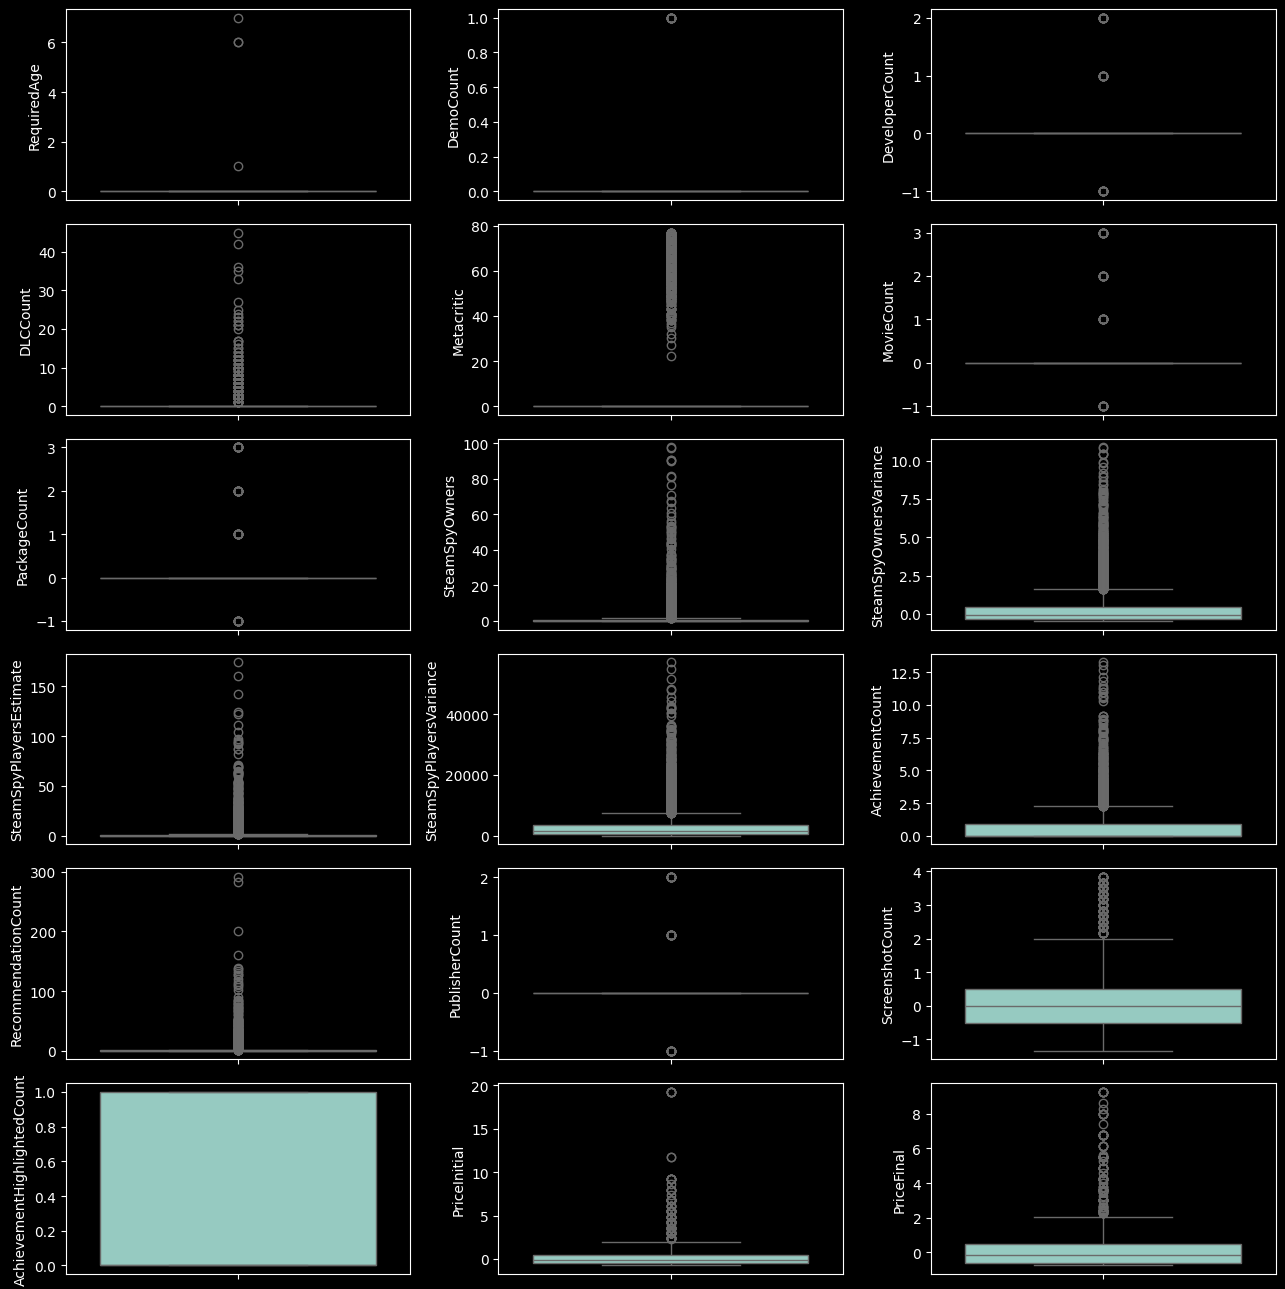

In [90]:
# comprobar resultados de eliminación de valores atípicos
# Crear una figura con múltiples gráficos
fig,axes=plt.subplots(6,3,figsize=(13,13))
#Trazar el diagrama de caja
sns.boxplot(y=dataset_def['RequiredAge'],ax=axes[0,0])
sns.boxplot(y=dataset_def['DemoCount'],ax=axes[0,1])
sns.boxplot(y=dataset_def['DeveloperCount'],ax=axes[0,2])
sns.boxplot(y=dataset_def['DLCCount'],ax=axes[1,0])
sns.boxplot(y=dataset_def['Metacritic'],ax=axes[1,1])
sns.boxplot(y=dataset_def['MovieCount'],ax=axes[1,2])
sns.boxplot(y=dataset_def['PackageCount'],ax=axes[2,0])
sns.boxplot(y=dataset_def['SteamSpyOwners'],ax=axes[2,1])
sns.boxplot(y=dataset_def['SteamSpyOwnersVariance'],ax=axes[2,2])
sns.boxplot(y=dataset_def['SteamSpyPlayersEstimate'],ax=axes[3,0])
sns.boxplot(y=dataset_def['SteamSpyPlayersVariance'],ax=axes[3,1])
sns.boxplot(y=dataset_def['AchievementCount'],ax=axes[3,2])
sns.boxplot(y=dataset_def['RecommendationCount'],ax=axes[4,0])
sns.boxplot(y=dataset_def['PublisherCount'],ax=axes[4,1])
sns.boxplot(y=dataset_def['ScreenshotCount'],ax=axes[4,2])
sns.boxplot(y=dataset_def['AchievementHighlightedCount'],ax=axes[5,0])
sns.boxplot(y=dataset_def['PriceInitial'],ax=axes[5,1])
sns.boxplot(y=dataset_def['PriceFinal'],ax=axes[5,2])
#Ajustar el espaciado entre gráficos
plt.tight_layout()
#Mostrar gráficos
plt.show()

# comprobar correlaciones

In [91]:
dataset_def.corr(numeric_only=True)

,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,...,language_russian,language_simplified_chinese,language_slovakian,language_spanish,language_swedish,language_text_only,language_thai,language_traditional_chinese,language_turkish,language_ukrainian
RequiredAge,1.000000,0.013565,-0.000351,-0.000118,-0.005649,-0.002909,0.000057,-0.002495,0.001175,-0.006156,...,-0.007829,0.045728,-0.000156,0.018158,-0.002745,NaN,-0.001457,0.060292,-0.002864,-0.002026
DemoCount,0.013565,1.000000,0.031873,0.039983,0.130044,0.054116,0.093207,0.003591,0.038104,0.083199,...,0.007437,-0.008122,-0.002741,0.047310,0.013203,NaN,-0.003638,-0.019595,0.006792,0.017489
DeveloperCount,-0.000351,0.031873,1.000000,0.055836,0.051214,0.247649,0.094203,0.054373,0.497880,0.245185,...,0.093899,0.041788,-0.000194,0.095019,0.026795,NaN,0.012149,0.039529,0.021107,0.017705
DLCCount,-0.000118,0.039983,0.055836,1.000000,0.114911,0.112889,0.110768,0.131877,0.039575,0.094690,...,0.061906,0.023687,-0.001920,0.090986,0.006085,NaN,-0.002006,0.047569,0.019996,0.010669
Metacritic,-0.005649,0.130044,0.051214,0.114911,1.000000,0.116746,0.253381,0.146557,0.067147,0.148082,...,0.133737,0.017282,-0.003119,0.222345,0.002604,NaN,-0.000178,0.012097,0.031946,0.013158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
language_text_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_thai,-0.001457,-0.003638,0.012149,-0.002006,-0.000178,0.030619,-0.020991,0.004260,0.015235,0.003046,...,0.175723,0.308885,-0.000805,0.156242,0.399257,NaN,1.000000,0.366367,0.400482,0.459246
language_traditional_chinese,0.060292,-0.019595,0.039529,0.047569,0.012097,0.043653,-0.014987,0.083573,0.035331,0.004202,...,0.239727,0.505975,0.052110,0.227860,0.271316,NaN,0.366367,1.000000,0.312393,0.259260
language_turkish,-0.002864,0.006792,0.021107,0.019996,0.031946,0.056423,-0.017855,0.091613,0.023046,0.014098,...,0.290023,0.325190,-0.001582,0.285299,0.388831,NaN,0.400482,0.312393,1.000000,0.349951


In [92]:
matrix=dataset_def.corr(numeric_only=True)
print(matrix['Metacritic'].sort_values(ascending=True)[0:30])
print(matrix['Metacritic'].sort_values(ascending=True)[30:60])
print(matrix['Metacritic'].sort_values(ascending=True)[60:90])

PriceCurrency_non_USD          -0.139517
GenreIsEarlyAccess             -0.121846
GenreIsCasual                  -0.119436
GenreIsIndie                   -0.055275
IsFree                         -0.052148
GenreIsNonGame                 -0.051267
GenreIsFreeToPlay              -0.040172
GenreIsSports                  -0.029038
GenreIsSimulation              -0.027868
CategoryInAppPurchase          -0.024251
GenreIsMassivelyMultiplayer    -0.024142
FreeVerAvail                   -0.020987
CategoryVRSupport              -0.017241
CategoryMMO                    -0.011256
SubscriptionAvail              -0.010811
language_audio_traduction      -0.007680
RequiredAge                    -0.005649
ControllerSupport              -0.003419
language_slovakian             -0.003119
CategoryIncludeSrcSDK          -0.002935
language_thai                  -0.000178
language_swedish                0.002604
PlatformWindows                 0.003119
language_greek                  0.003353
language_arabic 

In [93]:
matrix=dataset_def.corr(numeric_only=True)
print(matrix['RecommendationCount'].sort_values(ascending=True)[0:30])
print(matrix['RecommendationCount'].sort_values(ascending=True)[30:60])
print(matrix['RecommendationCount'].sort_values(ascending=True)[60:90])

CategorySinglePlayer        -0.043289
GenreIsCasual               -0.033352
PriceCurrency_USD           -0.024097
GenreIsNonGame              -0.016657
PurchaseAvail               -0.014361
GenreIsRacing               -0.007417
GenreIsSports               -0.006733
GenreIsIndie                -0.006008
SubscriptionAvail           -0.005365
RequiredAge                 -0.002495
ControllerSupport            0.000863
PlatformWindows              0.001726
FreeVerAvail                 0.002171
DemoCount                    0.003591
language_thai                0.004260
CategoryVRSupport            0.005894
language_english             0.012905
language_bulgarian           0.014143
GenreIsStrategy              0.015380
GenreIsEarlyAccess           0.016341
GenreIsAdventure             0.017313
CategoryInAppPurchase        0.022552
language_slovakian           0.023254
PriceCurrency_non_USD        0.024097
language_greek               0.026246
language_audio_traduction    0.029563
GenreIsSimul

In [94]:
matrix=dataset_def.corr(numeric_only=True)
print(matrix['SteamSpyPlayersEstimate'].sort_values(ascending=True)[0:30])
print(matrix['SteamSpyPlayersEstimate'].sort_values(ascending=True)[30:60])
print(matrix['SteamSpyPlayersEstimate'].sort_values(ascending=True)[60:90])

PriceCurrency_USD           -0.087711
PurchaseAvail               -0.067667
CategorySinglePlayer        -0.052574
GenreIsIndie                -0.039814
GenreIsCasual               -0.038768
ControllerSupport           -0.025490
GenreIsNonGame              -0.015909
GenreIsAdventure            -0.010677
SubscriptionAvail           -0.006747
GenreIsRacing               -0.006214
RequiredAge                 -0.003367
GenreIsEarlyAccess          -0.000615
PlatformWindows              0.002149
FreeVerAvail                 0.002575
GenreIsSports                0.006004
CategoryVRSupport            0.007330
DemoCount                    0.010235
language_english             0.010800
language_bulgarian           0.015907
language_thai                0.016733
language_greek               0.018093
language_audio_traduction    0.018576
PriceFinal                   0.025801
language_arabic              0.028059
GenreIsSimulation            0.029101
LinuxReqsHaveMin             0.030698
PriceInitial

# Generar variables para los modelos

In [96]:
var=['ScreenshotCount','MovieCount','DemoCount','RecommendationCount','PlatformWindows','PCReqsHaveMin','PlatformLinux',
   'PCReqsHaveRec','LinuxReqsHaveMin','PlatformMac','LinuxReqsHaveRec','MacReqsHaveMin','MacReqsHaveRec',
   'GenreIsEarlyAccess','PackageCount','DLCCount','PriceInitial','PriceFinal','IsFree','FreeVerAvail','PurchaseAvail',
   'PriceCurrency_USD', 'PriceCurrency_non_USD','CategoryInAppPurchase','SubscriptionAvail',
   'ControllerSupport','CategoryVRSupport','PublisherCount','GenreIsNonGame','GenreIsIndie','GenreIsAction',
   'GenreIsAdventure','GenreIsCasual','GenreIsStrategy','GenreIsRPG','GenreIsSimulation','GenreIsFreeToPlay','GenreIsSports',
   'GenreIsRacing','CategorySinglePlayer','GenreIsMassivelyMultiplayer','CategoryMultiplayer','CategoryMMO','CategoryCoop',
   'CategoryIncludeLevelEditor','CategoryIncludeSrcSDK','AchievementCount','AchievementHighlightedCount',
   'language_chinese','language_japanese','language_korean','language_thai','language_english','language_french',
   'language_german','language_dutch','language_danish','language_norwegian','language_finnish','language_slovakian',
   'language_portuguese','language_spanish','language_italian','language_polish','language_russian','language_czech',
   'language_arabic','language_bulgarian','language_hungarian','language_romanian','language_greek','language_audio_traduction',
   'SteamSpyOwnersVariance','SteamSpyOwners','Metacritic','RequiredAge']
# La variable SteamSpyPlayersVariance fue descartada por presentar alto riesgo de data leakage
X=dataset_def[var]
y=dataset_def.SteamSpyPlayersEstimate
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=48)

# Modelos de machine learning y deep learning

Tres modelos de machine learning de regresión fueron generados mediante la biblioteca scikit-learn: un modelo de bosque aleatorio o Random Forest (RandomForestRegressor), un modelo de Gradient Boosting (GradientBoostingRegressor) -ambos basados en ensambles de árboles de decisión-, y un modelo Multi Layer Perceptron o Red Neuronal (MLPRegressor). Aunque existen alternativas más populares para el Gradient Boosting como XGB y para las redes neuronales como PyTorch y TensorFlow, scikit-learn presenta varias fortalezas. En primer lugar, es muy intuitiva y sencilla de utilizar, además de contar con métodos simples para ejecutar métricas de validación. También facilita la realización de validación cruzada de manera sencilla e intuitiva.
Si bien podría argumentarse que la falta de integración con GPU o TPU podría ser problemática, los modelos ajustados correctamente han demostrado producir resultados satisfactorios sin necesitar valores extremadamente altos en sus parámetros de entrenamiento. Por lo tanto, el proceso de entrenamiento no requiere periodos prolongados de tiempo, eliminando así la necesidad de incorporar ninguna GPU o TPU. Incluso la red neuronal puede entrenarse en un periodo de tiempo relativamente corto.

In [97]:
# modelo de bosque aleatorio
steam_model_01=RandomForestRegressor(n_estimators=700,criterion='friedman_mse',random_state=48,verbose=True,
                                     min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=400,max_samples=1.0)
steam_model_01.fit(X_train,y_train)
predictions_model_01=steam_model_01.predict(X_valid)
print(predictions_model_01[0:8])
mae_01=mean_absolute_error(predictions_model_01,y_valid)
mse_01=mean_squared_error(y_valid,predictions_model_01)
rmse_01=np.sqrt(mse_01)
r2_01=steam_model_01.score(X_valid,y_valid)
scores_01=cross_val_score(steam_model_01,X,y,cv=5)
print("Mean Absolute Error=",mae_01)
print('Error cuadrático medio=',mse_01)
print('error raíz medio cuadrático=',rmse_01)
print('R^2=',r2_01)
print('cv=',scores_01)
print('cv mean=',scores_01.mean())

print('cv std=',scores_01.std())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   26.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[-0.14168244  0.51479787 -0.01499416  0.24591566 -0.13149836  0.0038485
  1.17876054 -0.01226336]


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   26.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   25.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   10.0s
[Parallel(n_jobs=1)]: Do

Mean Absolute Error= 0.30434298968062945
Error cuadrático medio= 1.9158299923475448
error raíz medio cuadrático= 1.384135106247777
R^2= 0.9291400107974725
cv= [0.88581941 0.96702311 0.97443917 0.86090069 0.62325913]
cv mean= 0.8622883022635968
cv std= 0.12746590232050034


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


In [98]:
# Modelo de Gradient booting
steam_model_02=GradientBoostingRegressor(n_estimators=600,criterion='friedman_mse',random_state=48,verbose=1,
                                         learning_rate=0.6898801,min_samples_split=2,max_leaf_nodes=206,
                                         loss='quantile',alpha=0.500,max_features='sqrt')
#n_estimators=56
steam_model_02.fit(X_train,y_train)
predictions_model_02=steam_model_02.predict(X_valid)
print(predictions_model_02[0:8])
mae_02=mean_absolute_error(predictions_model_02,y_valid)
mse_02=mean_squared_error(y_valid,predictions_model_02)
rmse_02=np.sqrt(mse_02)
r2_02=steam_model_02.score(X_valid,y_valid)
scores_02=cross_val_score(steam_model_02,X,y,cv=5)
print("Mean Absolute Error=",mae_02)
print('Error cuadrático medio=',mse_02)
print('error raíz medio cuadrático=',rmse_02)
print('R^2=',r2_02)
print('cv=',scores_02)
print('cv mean=',scores_02.mean())
print('cv std=',scores_02.std())

      Iter       Train Loss   Remaining Time 
         1           0.6672            5.66s
         2           0.6330            5.21s
         3           0.6098            5.06s
         4           0.5796            5.03s
         5           0.5308            4.95s
         6           0.5246            4.94s
         7           0.4843            4.96s
         8           0.4605            4.87s
         9           0.4424            4.78s
        10           0.4335            4.71s
        20           0.3837            4.36s
        30           0.2930            4.29s
        40           0.2634            4.16s
        50           0.2581            4.04s
        60           0.2472            4.02s
        70           0.2371            4.02s
        80           0.2315            3.90s
        90           0.2183            3.85s
       100           0.2119            3.74s
       200           0.1817            2.92s
       300           0.1600            2.17s
       40

In [99]:
# modelo de red neuronal (también llamado perceptrón multicapa)
steam_model_03=MLPRegressor(hidden_layer_sizes=412,max_iter=220,verbose=True,random_state=48,activation='tanh')
steam_model_03.fit(X_train,y_train)
predictions_model_03=steam_model_03.predict(X_valid)
print(predictions_model_03[0:8])
mae_03=mean_absolute_error(predictions_model_03,y_valid)
mse_03=mean_squared_error(y_valid,predictions_model_03)
rmse_03=np.sqrt(mse_03)
r2_03=steam_model_03.score(X_valid,y_valid)
scores_03=cross_val_score(steam_model_03,X,y,cv=5)
print("Mean Absolute Error=",mae_03)
print('Error cuadrático medio=',mse_03)
print('error raíz medio cuadrático=',rmse_01)
print('R^2=',r2_03)
print('cv=',scores_03)
print('cv mean=',scores_03.mean())
print('cv std=',scores_03.std())

Iteration 1, loss = 13.71951564
Iteration 2, loss = 8.78414191
Iteration 3, loss = 6.76384820
Iteration 4, loss = 5.42438023
Iteration 5, loss = 4.55481537
Iteration 6, loss = 3.91505396
Iteration 7, loss = 3.43374212
Iteration 8, loss = 3.07685715
Iteration 9, loss = 2.75665507
Iteration 10, loss = 2.53104549
Iteration 11, loss = 2.24234886
Iteration 12, loss = 2.06759816
Iteration 13, loss = 1.88913240
Iteration 14, loss = 1.71746664
Iteration 15, loss = 1.61065288
Iteration 16, loss = 1.53007318
Iteration 17, loss = 1.39771369
Iteration 18, loss = 1.36757555
Iteration 19, loss = 1.25324208
Iteration 20, loss = 1.16765021
Iteration 21, loss = 1.08913635
Iteration 22, loss = 1.05353977
Iteration 23, loss = 1.01146473
Iteration 24, loss = 0.91777063
Iteration 25, loss = 0.84657937
Iteration 26, loss = 0.84034878
Iteration 27, loss = 0.85837829
Iteration 28, loss = 0.80517788
Iteration 29, loss = 0.70242507
Iteration 30, loss = 0.69352511
Iteration 31, loss = 0.65768096
Iteration 32, lo

In [100]:
# Calcular la precisión del modelo 1 en el conjunto de entrenamiento
train_accuracy_01=steam_model_01.score(X_train,y_train)
# Calcular la precisión del modelo 1 en el conjunto de validación
val_accuracy_01=steam_model_01.score(X_valid,y_valid)
# mostrar los resultados
print("Precisión del modelo 1 en el conjunto de entrenamiento:",train_accuracy_01)
print("Precisión del modelo 1 en el conjunto de validación:",val_accuracy_01)

# Calcular la precisión del modelo 2 en el conjunto de entrenamiento
train_accuracy_02=steam_model_02.score(X_train,y_train)
# Calcular la precisión del modelo 2 en el conjunto de validación
val_accuracy_02=steam_model_02.score(X_valid,y_valid)
# mostrar los resultados
print("Precisión del modelo 2 en el conjunto de entrenamiento:",train_accuracy_02)
print("Precisión del modelo 2 en el conjunto de validación:",val_accuracy_02)

# Calcular la precisión del modelo 3 en el conjunto de entrenamiento
train_accuracy_03=steam_model_03.score(X_train,y_train)
# Calcular la precisión del modelo 3 en el conjunto de validación
val_accuracy_03=steam_model_03.score(X_valid,y_valid)
# mostrar los resultados
print("Precisión del modelo 3 en el conjunto de entrenamiento:",train_accuracy_03)
print("Precisión del modelo 3 en el conjunto de validación:",val_accuracy_03)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


Precisión del modelo 1 en el conjunto de entrenamiento: 0.9885486707517052
Precisión del modelo 1 en el conjunto de validación: 0.9291400107974725
Precisión del modelo 2 en el conjunto de entrenamiento: 0.9775874569050585
Precisión del modelo 2 en el conjunto de validación: 0.8264914170166048
Precisión del modelo 3 en el conjunto de entrenamiento: 0.9952385163822438
Precisión del modelo 3 en el conjunto de validación: 0.8062040446023109


# Guardar y cargar el modelo

In [101]:
# modelo definitivo sin random_state
fechira_huntsuke_model=MLPRegressor(hidden_layer_sizes=412,max_iter=220,verbose=True,activation='tanh')
fechira_huntsuke_model.fit(X_train,y_train)
scores_fehu=cross_val_score(fechira_huntsuke_model,X_train,y_train,cv=5)
print('cv=',scores_fehu)
print('cv mean=',scores_fehu.mean())
print('cv std=',scores_fehu.std())

Iteration 1, loss = 14.02394666
Iteration 2, loss = 9.04312839
Iteration 3, loss = 7.12953417
Iteration 4, loss = 5.77246002
Iteration 5, loss = 4.83844628
Iteration 6, loss = 4.12988343
Iteration 7, loss = 3.65863932
Iteration 8, loss = 3.24245710
Iteration 9, loss = 2.93464456
Iteration 10, loss = 2.66196998
Iteration 11, loss = 2.40937728
Iteration 12, loss = 2.16463958
Iteration 13, loss = 2.06478132
Iteration 14, loss = 1.97965750
Iteration 15, loss = 1.84521014
Iteration 16, loss = 1.65724695
Iteration 17, loss = 1.47178599
Iteration 18, loss = 1.34170413
Iteration 19, loss = 1.26617055
Iteration 20, loss = 1.20460102
Iteration 21, loss = 1.18308712
Iteration 22, loss = 1.06806566
Iteration 23, loss = 1.02786084
Iteration 24, loss = 1.06211297
Iteration 25, loss = 0.94709637
Iteration 26, loss = 0.92075378
Iteration 27, loss = 0.86672282
Iteration 28, loss = 0.77254337
Iteration 29, loss = 0.74055653
Iteration 30, loss = 0.76444468
Iteration 31, loss = 0.70638548
Iteration 32, lo

In [ ]:
joblib.dump(fechira_huntsuke_model,'/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/FechiraHuntsuke.pkl') # guardar el modelo
fechira_huntsuke=joblib.load('/content/drive/MyDrive/Colab Notebooks/fechira_huntsuke/FechiraHuntsuke.pkl') # cargar el modelo

In [ ]:
#funcion para insertar un numero float desde teclado dentro de un rango
def get_int_to_float_between_range(menor,mayor):
  while True:
    try:
      value = int(input(f'Enter a float between {menor} and {mayor}: '))
      if menor <= value <= mayor:
        return float(value)
      else:
        print(f'Value must be between {int(menor)} and {int(mayor)}')
    except ValueError:
      print('Invalid input. Please enter a float value.')
#función para insertar datos enteros desde teclado dentro de un rango
def get_float_between_range(menor,mayor):
  while True:
    try:
      value = float(input(f'Enter a float between {menor} and {mayor}: '))
      if menor <= value <= mayor:
        return value
      else:
        print(f'Value must be between {menor} and {mayor}')
    except ValueError:
      print('Invalid input. Please enter a float value.')
#función para insertar datos enteros desde teclado dentro de un rango
def get_int_between_range(menor,mayor):
  while True:
    try:
      value = int(input(f'Enter an integer between {menor} and {mayor}: '))
      if menor <= value <= mayor:
        return value
      else:
        print(f'Value must be between {menor} and {mayor}')
    except ValueError:
      print("Invalid input. Please enter an integer value.")
# función para insertar datos boleanos, como un intervalo discreto entrero de 0 a 1
def get_binarian_int():
  while True:
    try:
      value = int(input('Enter 1 for true or 0 for false: '))
      if 0 <= value <= 1:
        return value
      else:
        print(f'Value must be 0 or 1')
    except ValueError:
      print("Invalid input. Please enter an integer value.")

In [ ]:
category_a='Metacritic'
print(dataset_mod[category_a].min(),dataset_mod[category_a].max())
print(dataset[category_a].min(),dataset[category_a].max())
category_b='PublisherCount'
print(dataset_mod[category_b].min(),dataset_mod[category_b].max())
print(dataset[category_b].min(),dataset[category_b].max())

0.0 96.0
0 96
-1.0 3.0
0 4


In [105]:
#game_data={'ScreenshotCount':get_int_between_range(0,30),#
            #'MovieCount':get_int_between_range(0,20),#
            #'DemoCount': get_int_between_range(0,2),
            #'RecommendationCount':get_int_between_range(0,1427633),#
            #'PlatformWindows':get_binarian_int(),
            #'PCReqsHaveMin':get_binarian_int(),
            #'PlatformLinux':get_binarian_int(),
            #'PCReqsHaveRec':get_binarian_int(),
            #'LinuxReqsHaveMin':get_binarian_int(),
            #'PlatformMac':get_binarian_int(),
            #'LinuxReqsHaveRec':get_binarian_int(),
            #'MacReqsHaveMin':get_binarian_int(),
            #'MacReqsHaveRec':get_binarian_int(),
            #'GenreIsEarlyAccess':get_binarian_int(),
            #'PackageCount':get_int_between_range(0,700),#
            #'DLCCount':get_int_between_range(0,50),
            #'PriceInitial':get_float_between_range(0.0,500.0),#
            #'PriceFinal':get_float_between_range(0.0,500.),#
            #'IsFree':get_binarian_int(),
            #'FreeVerAvail':get_binarian_int(),
            #'PurchaseAvail':get_binarian_int(),
            #'PriceCurrency_USD':get_binarian_int(),
            #'PriceCurrency_non_USD':get_binarian_int(),
            #'CategoryInAppPurchase':get_binarian_int(),
            #'SubscriptionAvail':get_binarian_int,
            #'ControllerSupport':get_binarian_int,
            #'CategoryVRSupport':get_binarian_int,
            #'PublisherCount':get_int_between_range(0,4),#
            #'GenreIsNonGame':get_binarian_int,
            #'GenreIsIndie':get_binarian_int,
            #'GenreIsAction':get_binarian_int,
            #'GenreIsAdventure':get_binarian_int,
            #'GenreIsCasual':get_binarian_int,
            #'GenreIsStrategy':get_binarian_int,
            #'GenreIsRPG':get_binarian_int,
            #'GenreIsSimulation':get_binarian_int,
            #'GenreIsFreeToPlay':get_binarian_int,
            #'GenreIsSports':get_binarian_int,
            #'GenreIsRacing':get_binarian_int,
            #'CategorySinglePlayer':get_binarian_int,
            #'GenreIsMassivelyMultiplayer':get_binarian_int,
            #'CategoryMultiplayer':get_binarian_int,
            #'CategoryMMO':get_binarian_int,
            #'CategoryCoop':get_binarian_int,
            #'CategoryIncludeLevelEditor':get_binarian_int,
            #'CategoryIncludeSrcSDK':get_binarian_int,
            #'AchievementCount':get_int_between_range(0,1700),#
            #'AchievementHighlightedCount':get_int_between_range(0,10),#
            #'language_chinese':get_binarian_int,
            #'language_japanese':get_binarian_int,
            #'language_korean':get_binarian_int,
            #'language_thai':get_binarian_int,
            #'language_english':get_binarian_int,
            #'language_french':get_binarian_int,
            #'language_german':get_binarian_int,
            #'language_dutch':get_binarian_int,
            #'language_danish':get_binarian_int,
            #'language_norwegian':get_binarian_int,
            #'language_finnish':get_binarian_int,
            #'language_slovakian':get_binarian_int,
            #'language_portuguese':get_binarian_int,
            #'language_spanish':get_binarian_int,
            #'language_italian':get_binarian_int,
            #'language_polish':get_binarian_int,
            #'language_russian':get_binarian_int,
            #'language_czech':get_binarian_int,
            #'language_arabic':get_binarian_int,
            #'language_bulgarian':get_binarian_int,
            #'language_hungarian':get_binarian_int,
            #'language_romanian':get_binarian_int,
            #'language_greek':get_binarian_int,
            #'with_audio_traduction':get_binarian_int,
            #'SteamSpyOwnersVariance':np.var(get_int_between_range(0,100000000)),#
            #'SteamSpyOwners':get_int_between_range(0,100000000),
            #'Metacritic':get_int_between_range(0,100)
            #'RequiredAge'get_int_between_range(0,18)
    #}
#Convertir el diccionario en un DataFrame
#dataframe=pd.DataFrame([model_imput])
#escalar datos de entrada
#scaling_x=['DemoCount','DeveloperCount','DLCCount','Metacritic','MovieCount','PackageCount','RecommendationCount',
#'PublisherCount','ScreenshotCount','SteamSpyOwners','SteamSpyOwnersVariance',AchievementCount',
#'AchievementHighlightedCount','PriceFinal','PriceInitial','RequiredAge']
#trasform_imput=joblib.load('transform_x.pkl')
#dataframe[scaling_x]=trasform_imput.fit_transform(dataframe[scaling_x])
#Realizar predicción para el juego
#fechira_huntsuke=joblib.load('FechiraHuntsuke.pkl')
#prediction=fechira_huntsuke.predict(dataframe)
# escalamiento inverso para obtener resultados no escalados
#trasform_output=joblib.load('transform_y.pkl')
#dataframe['SteamSpyPlayersEstimate']=prediction
#scaling_y=['SteamSpyPlayersEstimate']
#dataframe[scaling_y]=trasform_output.inverse_transform(dataframe[scaling_y])
#mostrar la predicción
#print('Predicción para la canción:',dataframe['SteamSpyPlayersEstimate'])

# Referencias

Naeem, Ibrahim Muhammad. (2022). Stream Game Date [Data set]. Kaggle. extrraído desde: https://www.kaggle.com/datasets/ibriiee/stream-game-date


This notebook is under AGPL license